# Ejercicio Filtrado

**Curso:** Procesamiento de imágenes médicas

**Estudiantes:**
- María José Gómez
- José Rafael Peña

In [1]:
from pathlib import Path
import os
import itk
from typing import Union


BASE_PATH = Path(os.getcwd())

In [2]:
type(BASE_PATH)

pathlib.WindowsPath

In [3]:
def get_image_size(input_file: Union[str, Path], dimensions: int = 3):
    pixel_type = itk.ctype("unsigned char")
    image_type = itk.Image[pixel_type, dimensions]

    reader = itk.ImageFileReader[image_type].New()
    reader.SetFileName(str(input_file))
    reader.Update()
    
    image = reader.GetOutput()
    size = itk.size(image)
    
    return tuple(size)
    
def histogram_equalization(input_file: Union[str, Path], output_file: Union[str, Path], alpha: int, beta: int, radius_factor: int, dimensions: int = 3) -> None:
    if radius_factor < 2:
        raise ValueError("Radius factor must be greater or equal than 2")
    pixel_type = itk.ctype("unsigned char")
    image_type = itk.Image[pixel_type, dimensions]

    reader = itk.ImageFileReader[image_type].New()
    reader.SetFileName(str(input_file))

    image = reader.GetOutput()
    size = itk.size(image)

    histogram_equalization = itk.AdaptiveHistogramEqualizationImageFilter[image_type].New(reader)
    histogram_equalization.SetAlpha(alpha)
    histogram_equalization.SetBeta(beta)

    # Compute radius
    radius = itk.Size[dimensions]()
    for i in range(dimensions):
        radius[i] = max(1, int(size[i] / radius_factor))

    histogram_equalization.SetRadius(radius)
    
    itk.imwrite(histogram_equalization, str(output_file))

    return radius

def histogram_equalization_radius_value(input_file: Union[str, Path], output_file: Union[str, Path], alpha: int, beta: int, radius_value: int, dimensions: int = 3) -> None:
    
    pixel_type = itk.ctype("unsigned char")
    image_type = itk.Image[pixel_type, dimensions]

    reader = itk.ImageFileReader[image_type].New()
    reader.SetFileName(str(input_file))


    histogram_equalization = itk.AdaptiveHistogramEqualizationImageFilter[image_type].New(reader)
    histogram_equalization.SetAlpha(alpha)
    histogram_equalization.SetBeta(beta)

    # Compute radius
    radius = itk.Size[dimensions]()
    radius.Fill(radius_value)
    histogram_equalization.SetRadius(radius)
    
    itk.imwrite(histogram_equalization, str(output_file))

    return radius

In [4]:
input_path = BASE_PATH / "data/Panoramix-cropped.nii.gz"
output_path = BASE_PATH / "output/output_1.nii.gz"
size = histogram_equalization_radius_value(input_path, output_path, 0, 0, 5)

In [5]:
input_path = BASE_PATH / "data/Panoramix-cropped.nii.gz"
output_path = BASE_PATH / "output/output_2.nii.gz"
size = histogram_equalization(input_path, output_path, 0, 0, 9)

In [ ]:
input_path = BASE_PATH / "data/Panoramix-cropped.nii.gz"
output_path = BASE_PATH / "output/output_3.nii.gz"
size = histogram_equalization(input_path, output_path, 0, 0, 7)

In [18]:
input_path = BASE_PATH / "data/retina.png"
output_path = BASE_PATH / "output/retina_1.png"
histogram_equalization_radius_value(input_path, output_path, 0, 1, 5, dimensions=2)

input_path = BASE_PATH / "data/retina.png"
output_path = BASE_PATH / "output/retina_2.png"
histogram_equalization(input_path, output_path, 0, 1, 2, dimensions=2)

input_path = BASE_PATH / "data/retina.png"
output_path = BASE_PATH / "output/retina_3.png"
histogram_equalization(input_path, output_path, 1, 0, 3, dimensions=2)

In [21]:
input_path = BASE_PATH / "data/input_image.jpg"
output_path = BASE_PATH / "output/input_image_1.png"
radius_1 = histogram_equalization_radius_value(input_path, output_path, 0, 0, 5, dimensions=2)

input_path = BASE_PATH / "data/input_image.jpg"
output_path = BASE_PATH / "output/input_image_2.png"
radius_2 = histogram_equalization(input_path, output_path, 0, 1, 2, dimensions=2)

input_path = BASE_PATH / "data/input_image.jpg"
output_path = BASE_PATH / "output/input_image_3.png"
radius_3 = histogram_equalization(input_path, output_path, 1, 0, 3, dimensions=2)

In [25]:
input_path = BASE_PATH / "data/retina.png"
output_path = BASE_PATH / "output/retina_1.png"
histogram_equalization_radius_value(input_path, output_path, 0, 1, 20, dimensions=2)

input_path = BASE_PATH / "data/retina.png"
output_path = BASE_PATH / "output/retina_2.png"
histogram_equalization_radius_value(input_path, output_path, 0, 0, 20, dimensions=2)

In [57]:
input_path = BASE_PATH / "data/low_contrast_image.jpg"
output_path = BASE_PATH / "output/input_image_1.png"
histogram_equalization_radius_value(input_path, output_path, 0, 0, 100, dimensions=2)

input_path = BASE_PATH / "data/low_contrast_image.jpg"
output_path = BASE_PATH / "output/input_image_2.png"
histogram_equalization_radius_value(input_path, output_path, 0, 1, 100, dimensions=2)

input_path = BASE_PATH / "data/low_contrast_image.jpg"
output_path = BASE_PATH / "output/input_image_3.png"
histogram_equalization_radius_value(input_path, output_path, 1, 0, 100, dimensions=2)

input_path = BASE_PATH / "data/low_contrast_image.jpg"
output_path = BASE_PATH / "output/input_image_4.png"
histogram_equalization_radius_value(input_path, output_path, 1, 1, 100, dimensions=2)

In [65]:
input_path = BASE_PATH / "data/low_contrast_image.jpg"

output_path = BASE_PATH / "output/input_image_1.png"
histogram_equalization_radius_value(input_path, output_path, 0, 0, 5, dimensions=2)

output_path = BASE_PATH / "output/input_image_2.png"
histogram_equalization_radius_value(input_path, output_path, 0, 0, 50, dimensions=2)

output_path = BASE_PATH / "output/input_image_3.png"
histogram_equalization_radius_value(input_path, output_path, 0, 0, 100, dimensions=2)

output_path = BASE_PATH / "output/input_image_4.png"
histogram_equalization_radius_value(input_path, output_path, 0, 0, 200, dimensions=2)

In [ ]:
# Define image paths and corresponding (alpha, beta) values
image_data = [
    ("input_image_1.png", (0, 0)),
    ("input_image_2.png", (0, 1)),
    ("input_image_3.png", (1, 0)),
    ("input_image_4.png", (1, 1))
]

fig, axes = plt.subplots(2, 2, figsize=(10, 10), constrained_layout=True)

for ax, (filename, (alpha, beta)) in zip(axes.flatten(), image_data):
    img_path = BASE_PATH / "output" / filename
    img = mpimg.imread(img_path)
    ax.imshow(img, cmap='gray', aspect='auto')  # Ensures consistent aspect ratio
    ax.set_title(f"(alpha={alpha}, beta={beta})", fontsize=12)
    ax.axis("off")

plt.show()

In [56]:
get_image_size(input_path, dimensions=2)

(850, 823)

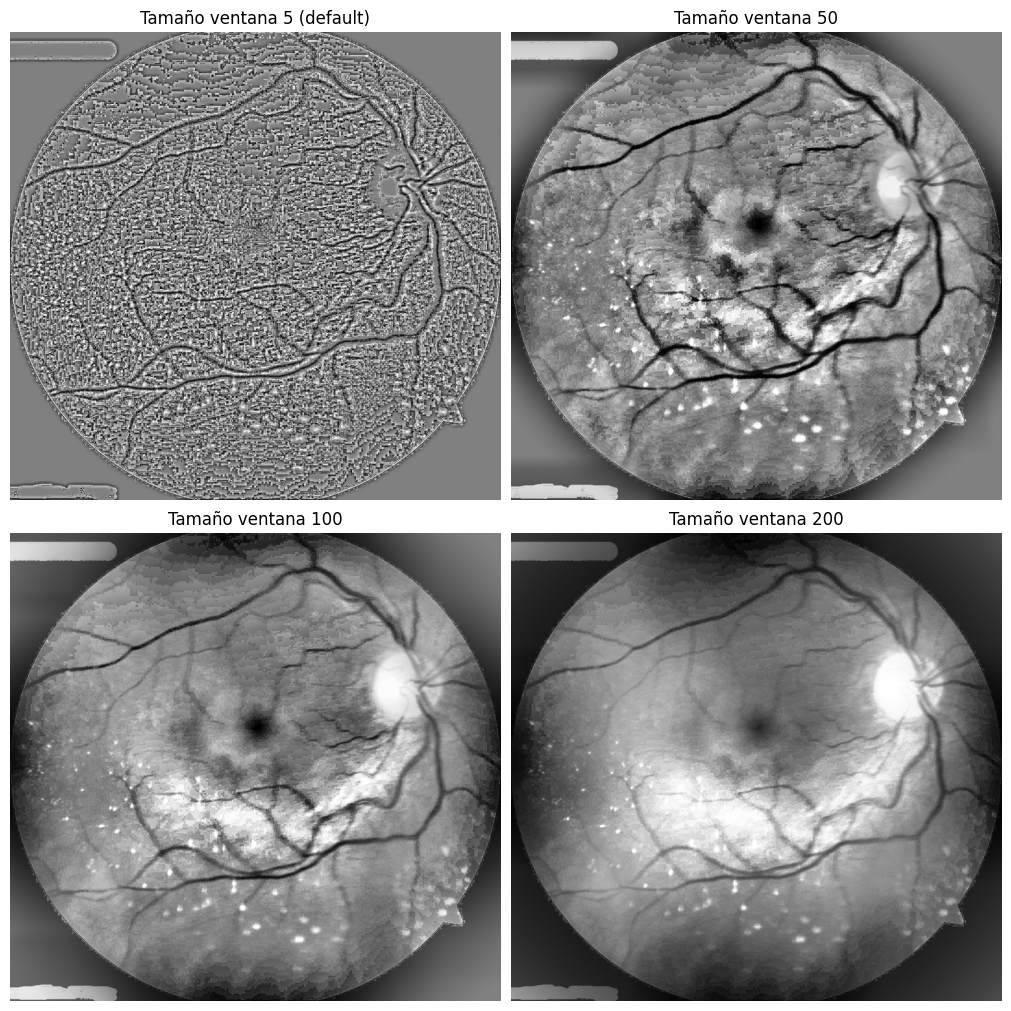

In [64]:
# Define image paths and corresponding (alpha, beta) values
image_data = [
    ("input_image_1.png", "Tamaño ventana 5 (default)"),
    ("input_image_2.png", "Tamaño ventana 50"),
    ("input_image_3.png", "Tamaño ventana 100"),
    ("input_image_4.png", "Tamaño ventana 200")
]

fig, axes = plt.subplots(2, 2, figsize=(10, 10), constrained_layout=True)

for ax, (filename, title) in zip(axes.flatten(), image_data):
    img_path = BASE_PATH / "output" / filename
    img = mpimg.imread(img_path)
    ax.imshow(img, cmap='gray', aspect='auto')  # Ensures consistent aspect ratio
    ax.set_title(title , fontsize=12)
    ax.axis("off")

plt.show()

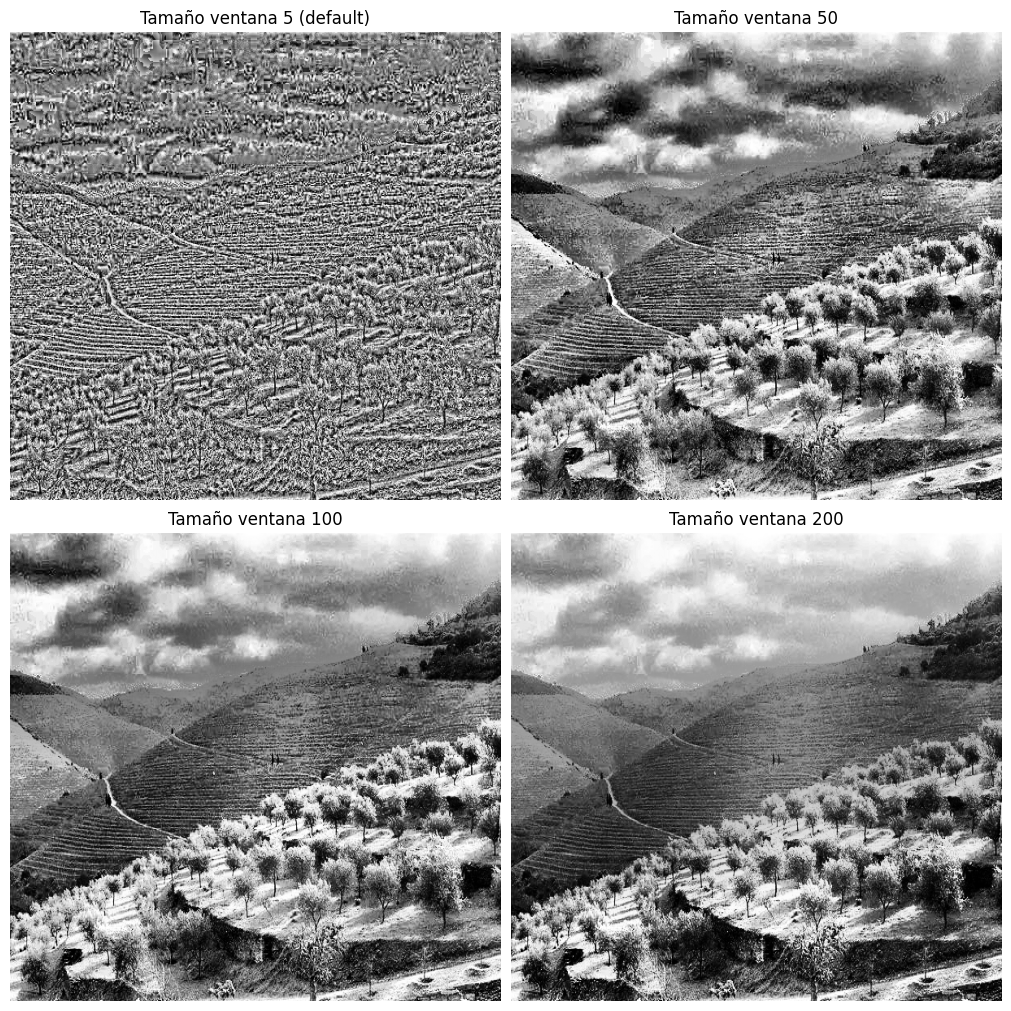

In [66]:
# Define image paths and corresponding (alpha, beta) values
image_data = [
    ("input_image_1.png", "Tamaño ventana 5 (default)"),
    ("input_image_2.png", "Tamaño ventana 50"),
    ("input_image_3.png", "Tamaño ventana 100"),
    ("input_image_4.png", "Tamaño ventana 200")
]

fig, axes = plt.subplots(2, 2, figsize=(10, 10), constrained_layout=True)

for ax, (filename, title) in zip(axes.flatten(), image_data):
    img_path = BASE_PATH / "output" / filename
    img = mpimg.imread(img_path)
    ax.imshow(img, cmap='gray', aspect='auto')  # Ensures consistent aspect ratio
    ax.set_title(title , fontsize=12)
    ax.axis("off")

plt.show()